In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [54]:
#Import csv file using panda dataframe function

In [55]:
Covid = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')
Covid.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [ ]:
#Data inspection and cleaning 

In [ ]:
#Check and count null values or missing information

In [56]:
Covid.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cdc_report_dt                  8405079 non-null  object
 1   pos_spec_dt                    2870789 non-null  object
 2   onset_dt                       4395957 non-null  object
 3   current_status                 8405079 non-null  object
 4   sex                            8405061 non-null  object
 5   age_group                      8404990 non-null  object
 6   Race and ethnicity (combined)  8405072 non-null  object
 7   hosp_yn                        8405079 non-null  object
 8   icu_yn                         8405079 non-null  object
 9   death_yn                       8405079 non-null  object
 10  medcond_yn                     8405079 non-null  object
dtypes: object(11)
memory usage: 705.4+ MB


In [57]:
#Count the number of null values

In [58]:
round(100*(Covid.isnull().sum()/len(Covid.index)), 10)

cdc_report_dt                     0.000000
pos_spec_dt                      65.844592
onset_dt                         47.698802
current_status                    0.000000
sex                               0.000214
age_group                         0.001059
Race and ethnicity (combined)     0.000083
hosp_yn                           0.000000
icu_yn                            0.000000
death_yn                          0.000000
medcond_yn                        0.000000
dtype: float64

In [59]:
#Drop the columns with too many null values

In [60]:
Covid = Covid.drop(['pos_spec_dt','onset_dt'],axis=1)
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 9 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   current_status                 object
 2   sex                            object
 3   age_group                      object
 4   Race and ethnicity (combined)  object
 5   hosp_yn                        object
 6   icu_yn                         object
 7   death_yn                       object
 8   medcond_yn                     object
dtypes: object(9)
memory usage: 577.1+ MB


In [61]:
round(100*(Covid.isnull().sum()/len(Covid.index)), 2)

cdc_report_dt                    0.0
current_status                   0.0
sex                              0.0
age_group                        0.0
Race and ethnicity (combined)    0.0
hosp_yn                          0.0
icu_yn                           0.0
death_yn                         0.0
medcond_yn                       0.0
dtype: float64

In [62]:
Covid.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [63]:
Covid['current_status'].value_counts()

Laboratory-confirmed case    7910118
Probable Case                 494961
Name: current_status, dtype: int64

In [64]:
Covid['sex'] = Covid['sex'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [65]:
Covid['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      93365
Other          207
Name: sex, dtype: int64

In [66]:
Covid['Race and ethnicity (combined)'] = Covid['Race and ethnicity (combined)'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [67]:
Covid['Race and ethnicity (combined)'].value_counts()

Unknown                                                 3382695
White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [68]:
Covid['hosp_yn'] = Covid['hosp_yn'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [69]:
Covid.hosp_yn.value_counts()

Unknown    4363752
No         3502556
Yes         538771
Name: hosp_yn, dtype: int64

In [70]:
Covid['icu_yn'] = Covid['icu_yn'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [71]:
Covid.icu_yn.value_counts()

Unknown    7464517
No          879671
Yes          60891
Name: icu_yn, dtype: int64

In [72]:
Covid['death_yn'] = Covid['death_yn'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [73]:
Covid.death_yn.value_counts()

Unknown    4530689
No         3690813
Yes         183577
Name: death_yn, dtype: int64

In [74]:
Covid['medcond_yn'] = Covid['medcond_yn'].apply(lambda x: 'Unknown' if x == 'Missing' else x)

In [75]:
Covid.medcond_yn.value_counts()

Unknown    6901408
Yes         785255
No          718416
Name: medcond_yn, dtype: int64

In [76]:
#A large percentage of unknown values in most of the categorical columns. However not dealing with them for now. 

In [77]:
Covid.cdc_report_dt.head()

0    2020/11/10
1    2020/11/14
2    2020/11/19
3    2020/11/14
4    2020/11/13
Name: cdc_report_dt, dtype: object

In [78]:
Covid['Year'] = Covid.cdc_report_dt.apply(lambda x: int(x.split('/')[0]))
Covid['Month'] = Covid.cdc_report_dt.apply(lambda x: int(x.split('/')[1]))
Covid['Date'] = Covid.cdc_report_dt.apply(lambda x: int(x.split('/')[2]))

In [79]:
Covid = Covid.drop('cdc_report_dt',axis=1)

In [80]:
Covid.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month,Date
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,2020,11,10
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11,14
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11,19
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown,2020,11,14
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,11,13


In [81]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   current_status                 object
 1   sex                            object
 2   age_group                      object
 3   Race and ethnicity (combined)  object
 4   hosp_yn                        object
 5   icu_yn                         object
 6   death_yn                       object
 7   medcond_yn                     object
 8   Year                           int64 
 9   Month                          int64 
 10  Date                           int64 
dtypes: int64(3), object(8)
memory usage: 705.4+ MB


In [82]:
Covid['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

In [83]:
#Dropping all rows with 'Unknown values' as well as dropping columns that are extremely skewed. 

In [84]:
Covid = Covid[Covid['Race and ethnicity (combined)'] != 'Unknown']
Covid = Covid[Covid.death_yn != 'Unknown']
Covid = Covid[Covid['hosp_yn'] != 'Unknown']
Covid = Covid.drop('icu_yn',axis=1)
Covid = Covid.drop('medcond_yn',axis=1)
Covid = Covid.drop('Year',axis=1)
Covid = Covid[Covid.sex != 'Unknown']
Covid = Covid[Covid.age_group != 'Unknown']

In [85]:
Covid.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,death_yn,Month,Date
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,11,10
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,11,14
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,11,19
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,11,13
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,11,9


In [86]:
lis = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
Covid['Month'] = Covid['Month'].apply(lambda x : lis[x-1])
Covid['Month'].value_counts()

Oct      386330
Nov      330068
July     319933
Aug      307821
Sept     283115
June     282875
May      167242
April    145247
March     36176
Feb         323
Jan          61
Name: Month, dtype: int64

In [87]:
Covid.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,death_yn,Month,Date
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,10
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,14
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,19
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,13
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,9


In [88]:
#We come to the end of our data inspection and cleaning

In [89]:
#EDA

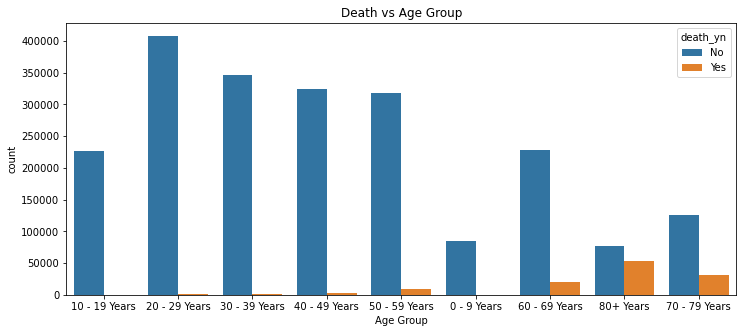

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x=Covid['age_group'],hue=Covid['death_yn'])
plt.title('Death vs Age Group')
plt.xlabel('Age Group')
plt.show()

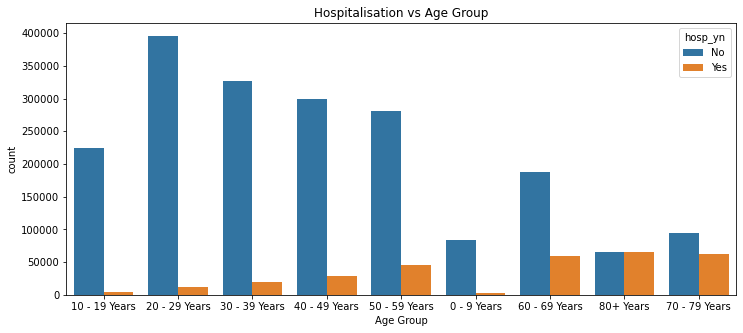

In [91]:
plt.figure(figsize=(12,5))
sns.countplot(x=Covid['age_group'],hue=Covid['hosp_yn'])
plt.title('Hospitalisation vs Age Group')
plt.xlabel('Age Group')
plt.show()

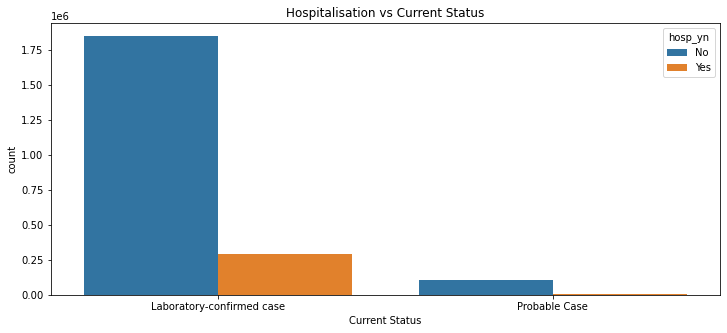

In [92]:
plt.figure(figsize=(12,5))
sns.countplot(x=Covid['current_status'],hue=Covid['hosp_yn'])
plt.title('Hospitalisation vs Current Status')
plt.xlabel('Current Status')
plt.show()

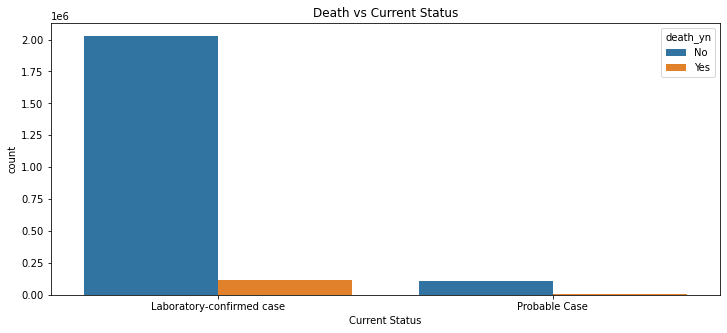

In [93]:
plt.figure(figsize=(12,5))
sns.countplot(x=Covid['current_status'],hue=Covid['death_yn'])
plt.title('Death vs Current Status')
plt.xlabel('Current Status')
plt.show()

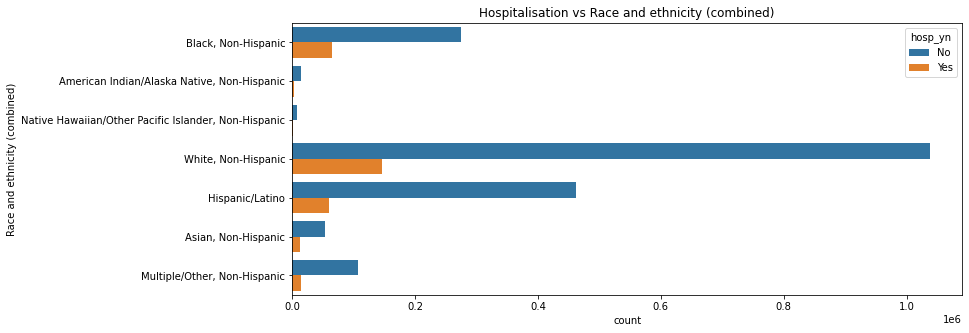

In [94]:
plt.figure(figsize=(12,5))
sns.countplot(y=Covid['Race and ethnicity (combined)'],hue=Covid['hosp_yn'])
plt.title('Hospitalisation vs Race and ethnicity (combined)')
plt.ylabel('Race and ethnicity (combined)')
plt.show()

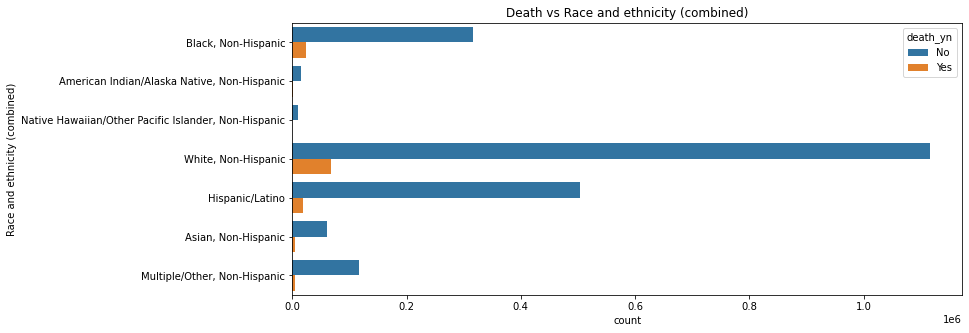

In [95]:
plt.figure(figsize=(12,5))
sns.countplot(y=Covid['Race and ethnicity (combined)'],hue=Covid['death_yn'])
plt.title('Death vs Race and ethnicity (combined)')
plt.ylabel('Race and ethnicity (combined)')
plt.show()

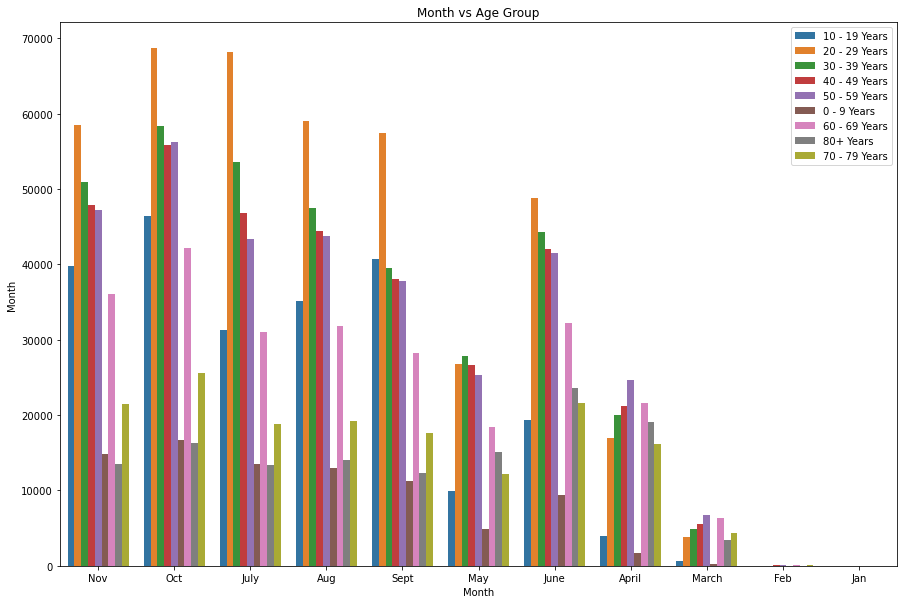

In [96]:
plt.figure(figsize=(15,10))
sns.countplot(x='Month',hue='age_group',data=Covid)
plt.title('Month vs Age Group')
plt.ylabel('Month')
plt.legend(loc='upper right') 
plt.show()

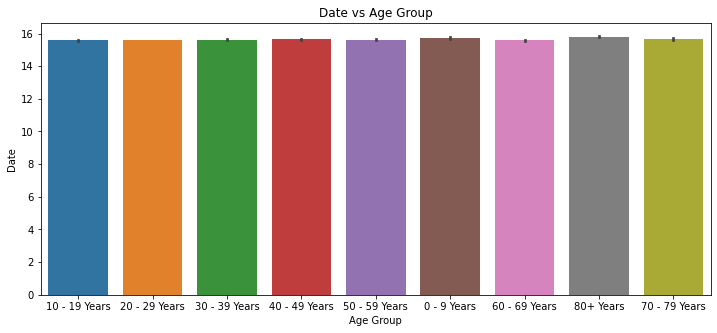

In [97]:
plt.figure(figsize=(12,5))
sns.barplot(x='age_group',y='Date',data=Covid)
plt.title('Date vs Age Group')
plt.ylabel('Date')
plt.xlabel('Age Group')
plt.show()

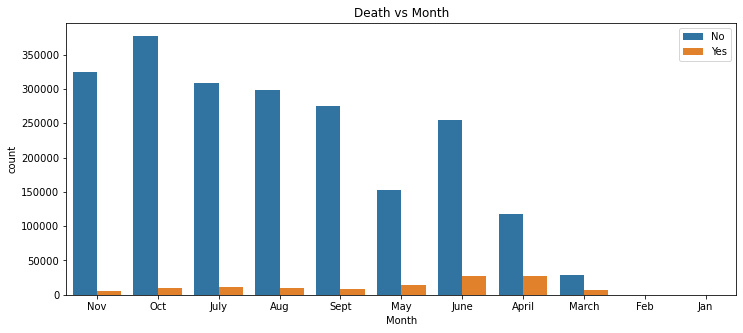

In [98]:
plt.figure(figsize=(12,5))
sns.countplot(x='Month',hue='death_yn',data=Covid)
plt.title('Death vs Month')
plt.xlabel('Month')
plt.legend(loc='upper right') 
plt.show()

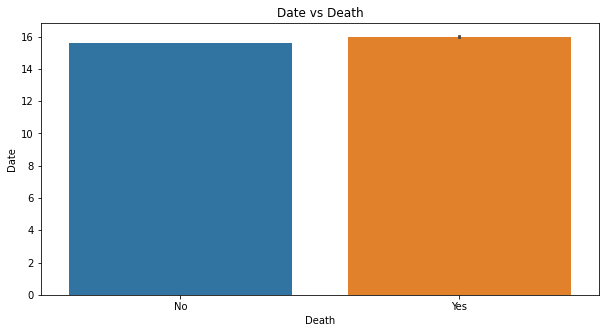

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x='death_yn',y='Date',data=Covid)
plt.title('Date vs Death')
plt.xlabel('Death')
plt.show()

In [ ]:
#We come to the end of our Exploratory Data Analysis-EDA

In [ ]:
#Model building

In [100]:
Covid.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,death_yn,Month,Date
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,10
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,14
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,19
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,13
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Nov,9


In [101]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259191 entries, 0 to 8404673
Data columns (total 8 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   current_status                 object
 1   sex                            object
 2   age_group                      object
 3   Race and ethnicity (combined)  object
 4   hosp_yn                        object
 5   death_yn                       object
 6   Month                          object
 7   Date                           int64 
dtypes: int64(1), object(7)
memory usage: 155.1+ MB


In [102]:
#Creating dummy variables and not dropping the first dummy since we wish to study the relationship between the target and 
#dependent variables. 

In [103]:
# pandas.get_dummies() converts categorical data into dummy or indicator variables. Try this:
#con = pd.Series(list('abcba'))
#print(pd.get_dummies(con)).

In [104]:
status = pd.get_dummies(Covid['current_status'], drop_first = False)
Covid = pd.concat([Covid, status], axis = 1)
Covid.drop(['current_status'], axis = 1, inplace = True)
status = pd.get_dummies(Covid['age_group'], drop_first = False)
Covid = pd.concat([Covid, status], axis = 1)
Covid.drop(['age_group'], axis = 1, inplace = True)
status = pd.get_dummies(Covid['Race and ethnicity (combined)'], drop_first = False)
Covid = pd.concat([Covid, status], axis = 1)
Covid.drop(['Race and ethnicity (combined)'], axis = 1, inplace = True)
status = pd.get_dummies(Covid['sex'], drop_first = False)
Covid = pd.concat([Covid, status], axis = 1)
Covid.drop(['sex'], axis = 1, inplace = True)
status = pd.get_dummies(Covid['Month'], drop_first = False)
Covid = pd.concat([Covid, status], axis = 1)
Covid.drop(['Month'], axis = 1, inplace = True)
Covid.head()

,hosp_yn,death_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,40 - 49 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,No,No,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,No,No,14,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,No,No,19,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,No,No,13,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,No,No,9,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
Covid['death_yn'] = Covid['death_yn'].map({'Yes': 1, "No": 0})
Covid['hosp_yn'] = Covid['hosp_yn'].map({'Yes': 1, "No": 0})
Covid.death_yn.value_counts()

0    2138909
1     120282
Name: death_yn, dtype: int64

In [106]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259191 entries, 0 to 8404673
Data columns (total 35 columns):
 #   Column                                                Dtype
---  ------                                                -----
 0   hosp_yn                                               int64
 1   death_yn                                              int64
 2   Date                                                  int64
 3   Laboratory-confirmed case                             uint8
 4   Probable Case                                         uint8
 5   0 - 9 Years                                           uint8
 6   10 - 19 Years                                         uint8
 7   20 - 29 Years                                         uint8
 8   30 - 39 Years                                         uint8
 9   40 - 49 Years                                         uint8
 10  50 - 59 Years                                         uint8
 11  60 - 69 Years                        

In [107]:
X = Covid.drop(['death_yn'], axis=1)
X.head()

,hosp_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,40 - 49 Years,50 - 59 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,10,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,14,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,19,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,13,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,9,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
y = Covid['death_yn']
y.head()

0     0
1     0
2     0
4     0
11    0
Name: death_yn, dtype: int64

In [109]:
#Taking a very small sample of the data, 1% for training as we have a lot of data. 

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=100)
X_train.head()

,hosp_yn,Date,Laboratory-confirmed case,Probable Case,0 - 9 Years,10 - 19 Years,20 - 29 Years,30 - 39 Years,40 - 49 Years,50 - 59 Years,...,Aug,Feb,Jan,July,June,March,May,Nov,Oct,Sept
6850701,1,10,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3509308,0,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2411316,0,10,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5132619,0,28,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1310517,0,17,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

In [117]:
model = RandomForestClassifier(random_state=100, n_jobs=-1,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

In [120]:
predictions = model.predict(X_test)

In [121]:
score = model.score(X_test, y_test)
print(score)

0.9263089917585797


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

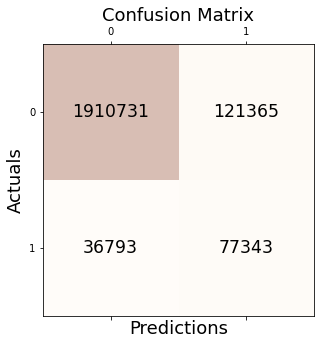

In [123]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

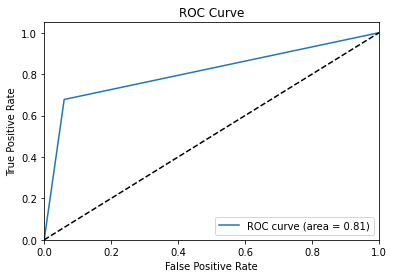

In [141]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictions)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [139]:
y_train_pred = model.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

Accuracy:  0.951168122947264
Recall:  0.9646924829157175
Precision: 0.5280548628428927
F1 Score: 0.6825141015310233


In [140]:
y_test_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy:  0.9263089917585797
Recall:  0.6776389570337141
Precision: 0.3892294220665499
F1 Score: 0.4944509084399893


# END FOR NOW #